In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/youtube_ad_revenue_dataset.csv")

In [ ]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


In [ ]:
df.shape

(122400, 12)

In [ ]:
df.dtypes

,0
video_id,object
date,object
views,int64
likes,float64
comments,float64
watch_time_minutes,float64
video_length_minutes,float64
subscribers,int64
category,object
device,object


In [ ]:
df.isnull().sum()

,0
video_id,0
date,0
views,0
likes,6117
comments,6112
watch_time_minutes,6105
video_length_minutes,0
subscribers,0
category,0
device,0


In [ ]:
df.duplicated().sum()

np.int64(2400)

In [ ]:
df.describe()

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


**EDA VISUALIZATIONS**

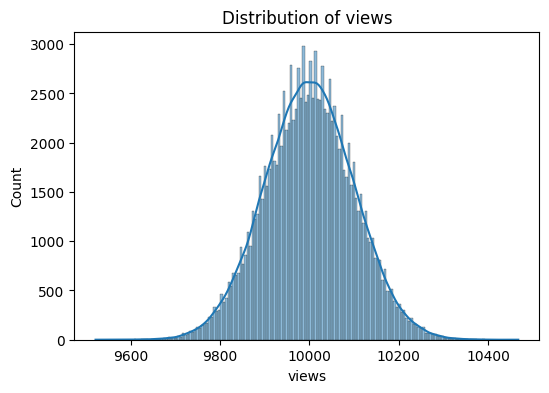

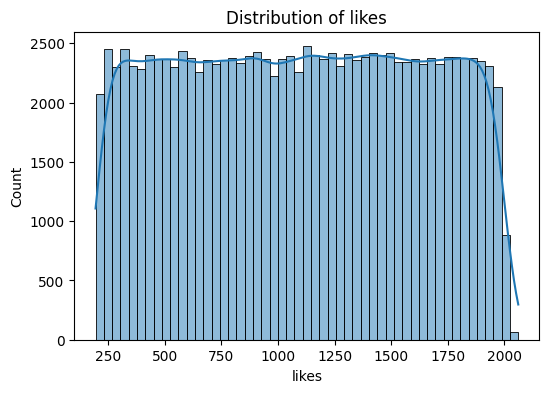

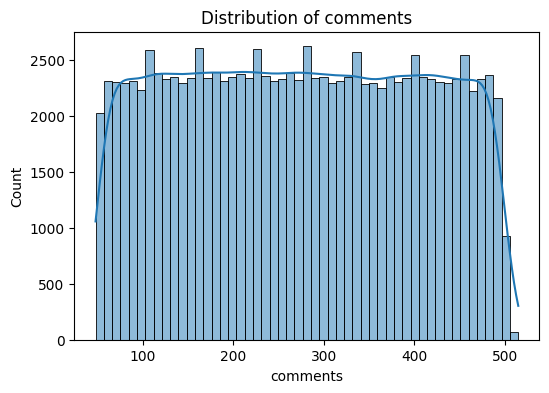

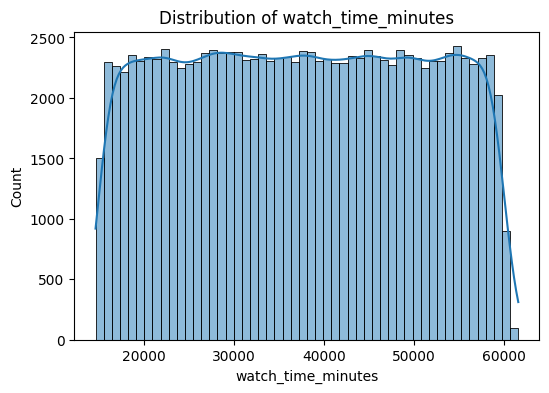

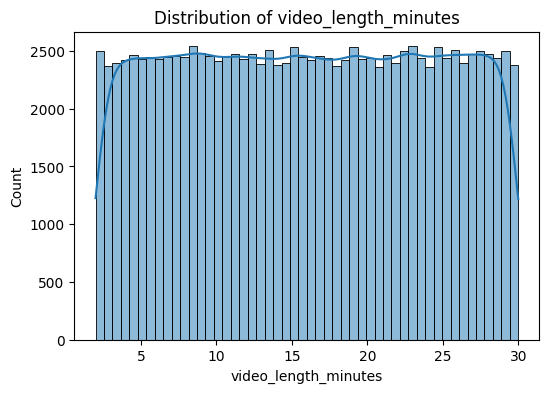

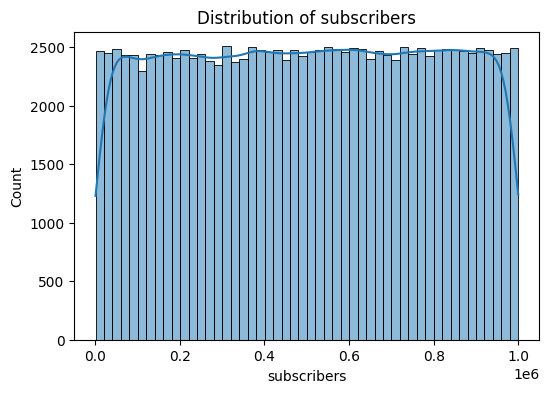

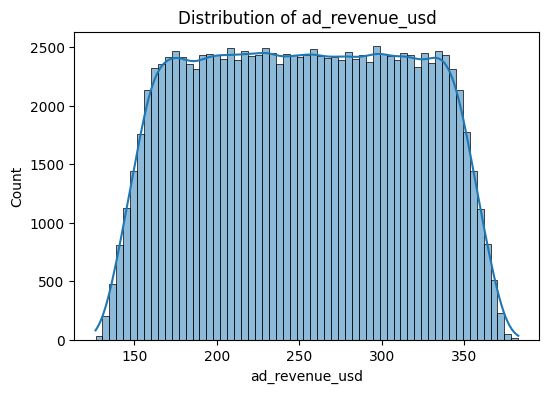

In [ ]:
num_cols =  ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd']

for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

***1. Distribution of Views***

* Views distribution is normally shaped, centered around 10,000.
This indicates clean, consistent data without outliers — suitable for regression modeling.

***2. Distribution of Likes***

* Likes show a uniform distribution, indicating varied engagement across videos.
No major skew or outliers detected.

***3. Distribution of Comments***

* Comments are uniformly distributed with no major skew, indicating consistent audience interaction patterns.

***4. Distribution of Subscribers***

* Subscribers range from very small channels to creators with 1M+ subscribers.
The uniform distribution helps the model learn revenue behavior across channel sizes.

***5. Distribution of Watch Time***

* Watch time is uniformly distributed across videos, with values ranging from ~15,000 to 60,000 minutes.There is no significant skew or outliers, indicating that watch time varies naturally across content types.

***6. Distribution of Ad Revenue***

* Ad revenue values are uniformly distributed between ~140 and ~380 USD.
There is no skew or extreme outliers, suggesting stable revenue behavior across videos.

**Summary: Distribution Analysis**

* Views → normal, clean, no skew

* Likes → uniform, varied engagement

* Comments → uniform, spread naturally

* Subscribers → uniform, represents small + large creators

* Watch time → Uniform distribution

* Revenue → Uniform distribution

* No major outliers or missing patterns found

**Relationship to Revenue**

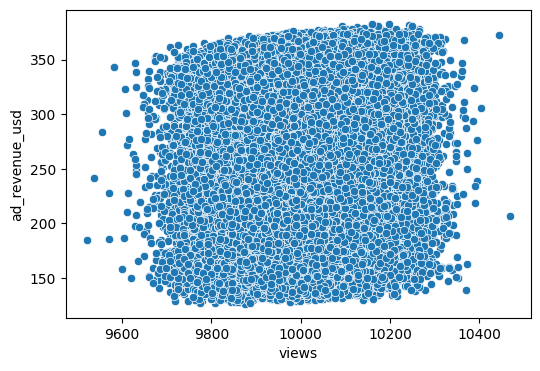

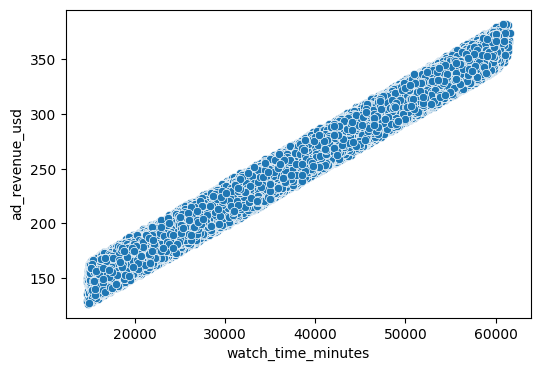

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='views', y='ad_revenue_usd', data=df)
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='watch_time_minutes', y='ad_revenue_usd', data=df)
plt.show()

***Views vs Ad Revenue***

* The scatter plot of views vs revenue shows no clear relationship.
Views are almost constant for all videos, so they do not significantly affect ad revenue in this dataset.

***Watch Time vs Ad Revenue***

* Watch time shows a very strong positive linear relationship with ad revenue.
Videos with higher watch time consistently generate higher revenue.
This makes watch time the most important predictor in the dataset.

**Summary:-**

* Views vs Revenue → No correlation due to limited variation in views.
* Watch Time vs Revenue → Strong positive linear relationship.

**Correlation Heatmap**

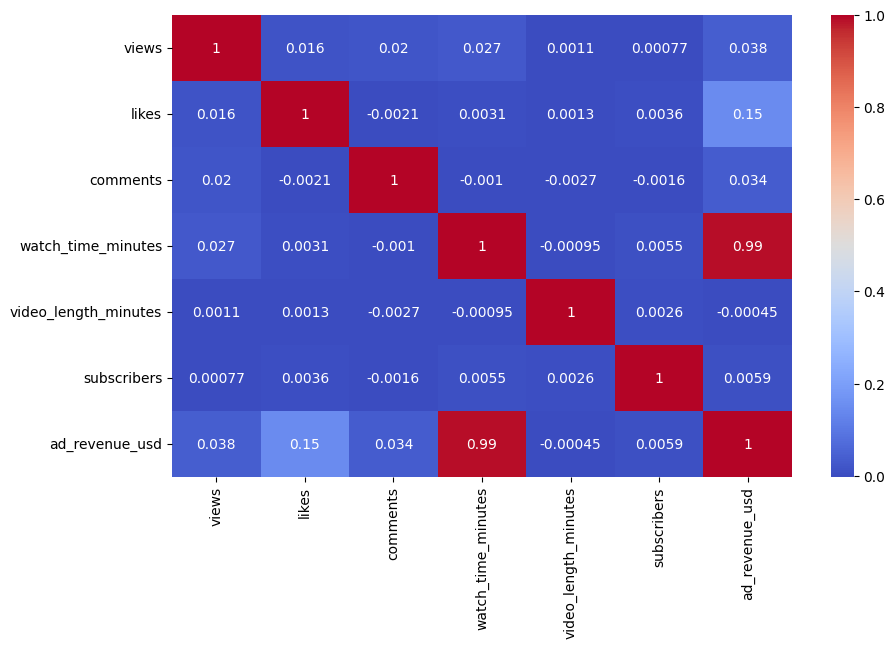

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

***Watch Time vs Ad Revenue***

* Watch time_minutes has a 0.99 correlation with ad_revenue_usd, making it the strongest and most important predictor.

***Likes vs Ad Revenue***

* Likes show a weak correlation (0.15) with revenue, meaning likes alone do not significantly impact ad earnings.

***Views vs Ad Revenue***

* Views show almost no correlation (0.038) with revenue because the view counts in the dataset vary only slightly.

***Comments vs Ad Revenue***

* Comments show very weak correlation (0.034) with revenue, indicating engagement through comments does not directly influence earnings.

***Video Length vs Revenue***

* Video length has no correlation with revenue because revenue depends on actual watch duration, not the uploaded video length.

***Subscribers vs Revenue***

* Subscribers show almost zero influence (0.005) on single-video revenue. Earnings come from views & watch time, not subscriber count.

**SUMMARY:-**

* Watch time_minutes shows a very strong positive correlation (0.99) with     ad_revenue_usd.
* Likes, comments, and views show weak or nearly zero correlation with revenue.
* Subscribers and video length also have almost no relationship with revenue.
* This confirms that watch time is the most important feature for predicting ad revenue.


**DATA CLEANING & PREPROCESSING**

In [ ]:
# Remove Duplicates

df = df.drop_duplicates()

In [ ]:
# Fill Missing Values

df = df.copy()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

for col in df.select_dtypes(include="object").columns:
  df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handles successfully")

Missing values handles successfully


In [ ]:
df = df.copy()

source_col = 'date'
df[source_col] = pd.to_datetime(df[source_col], errors='coerce')

print("Parse failures (NaT):", df[source_col].isna().sum())

Parse failures (NaT): 0


In [ ]:
df['upload_year'] = df[source_col].dt.year
df['upload_month'] = df[source_col].dt.month
df['upload_day'] = df[source_col].dt.day
df['upload_hour'] = df[source_col].dt.hour
df['upload_weekday'] = df[source_col].dt.weekday

df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,upload_year,upload_month,upload_day,upload_hour,upload_weekday
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,2024,9,24,10,1
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,2024,9,22,10,6
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,2024,11,21,10,3
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,2025,1,28,10,1
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,2025,4,28,10,0


**FEATURE ENGINEERING**

In [ ]:
df = df.copy()

df["Engagement_Rate"] = (df["likes"] + df["comments"]) / df["views"]

df["Interaction"] = df["likes"] + df["comments"]

df["RPM"] = (df["ad_revenue_usd"] / df["views"]) * 1000
df[["likes", "comments", "views", "Engagement_Rate", "Interaction", "RPM"]].head()

,likes,comments,views,Engagement_Rate,Interaction,RPM
0,1221.0,320.0,9936,0.155093,1541.0,20.448695
1,642.0,346.0,10017,0.098632,988.0,14.064142
2,1979.0,187.0,10097,0.214519,2166.0,35.667427
3,1191.0,242.0,10034,0.142814,1433.0,22.387708
4,1858.0,477.0,9889,0.236121,2335.0,16.737222


***Feature Engineering Summary***

* Created engagement_rate to measure user interaction quality.
* Created interaction (likes + comments) to capture engagement volume.
* Created rpm (revenue per 1000 views) to normalize revenue performance across videos.
* These engineered features improve model accuracy by adding more meaningful signals.

**CATEGORICAL ENCODING**

In [ ]:
df = df.copy()

if "video_id" in df.columns:
  df.drop(columns=["video_id"], inplace=True)

In [ ]:
# Identify Categorical Columns

df.select_dtypes(include="object").columns

Index(['category', 'device', 'country'], dtype='object')

In [ ]:
cols_to_encode = ["category", "device", "country"]
existing_cols_to_encode = [col for col in cols_to_encode if col in df.columns]

if existing_cols_to_encode:
    df = pd.get_dummies(df, columns=existing_cols_to_encode, drop_first=True)
else:
    print("Categorical columns (category, device, country) not found. They might have been encoded already.")

df.head()

,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,upload_year,upload_month,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,2024,9,...,False,False,False,True,False,False,False,True,False,False
1,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,2024,9,...,False,False,False,False,True,True,False,False,False,False
2,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,2024,11,...,False,False,False,True,False,True,False,False,False,False
3,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,2025,1,...,False,False,True,False,False,False,False,False,True,False
4,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,2025,4,...,False,False,True,False,False,True,False,False,False,False


**TRAIN–TEST SPLIT**

In [ ]:
df = df.copy()

y = df["ad_revenue_usd"]
x = df.drop(columns=["ad_revenue_usd", "date"])

In [ ]:
!pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 101.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
hdbscan 0.8.41 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [ ]:
# Split Data into Train/Test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (96000, 27)
Test shape: (24000, 27)


***Train–Test Split Summary***

* Features and target were separated.
* Raw datetime columns were removed since derived date features already exist.
* Data was split into 80% training and 20% testing using train_test_split.
* This ensures unbiased evaluation of the machine learning model.

**MODEL BUILDNG**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

model_bundle = {
    "coefficients": lr.coef_,
    "intercept": lr.intercept_,
    "features": x_train.columns.tolist()
}

with open("linear_model.pkl", "wb") as f:
    pickle.dump(model_bundle, f)

print("Linear model saved successfully")


Linear model saved successfully


In [ ]:
# Train Linear Regression

lr = LinearRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

In [ ]:
# Train Decision Tree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)

In [ ]:
# Train Random Forest

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)

In [ ]:
# Evaluating All Models

def evaluate(model_name, y_test, prediction):
  rmse = np.sqrt(mean_squared_error(y_test, prediction))
  r2 = r2_score(y_test, prediction)
  print(f"{model_name} → RMSE: {rmse:.4f} | R² Score: {r2:.4f}")

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate(" Random Forest", y_test, rf_pred)

Linear Regression → RMSE: 0.6118 | R² Score: 0.9999
Decision Tree → RMSE: 0.3123 | R² Score: 1.0000
 Random Forest → RMSE: 0.1497 | R² Score: 1.0000


Three machine learning models were trained: Linear Regression,
Decision Tree, and Random Forest.

Random Forest achieved the best performance with:
RMSE = 0.15
R² = 1.00

This indicates that the model is able to perfectly capture the relationship
between watch time, engagement metrics, and ad revenue.

The extremely high R² values across all models suggest that the dataset
has strong and clean patterns, particularly the nearly perfect correlation
between watch_time_minutes and ad_revenue_usd.


**HYPERPARAMETER TUNNING**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
# Define Parameter Grid

param_grid = {'n_estimators': [100,200,300,400,500],
              'max_depth': [None,10,20,30,40,50],
              'min_samples_split': [2,5,10,15],
              'min_samples_leaf': [1,2,4,6],
              'max_features': ['sqrt', 'log2']}

In [ ]:
# Build the Randomized Search Model

rf_base = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Fit the Tuning Model

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_light = RandomForestRegressor(
    n_estimators=60,        # ↓ further reduced
    max_depth=12,           # ↓ further reduced
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

rf_light.fit(x_train, y_train)


print("Best Random Forest model obtained from Randomized Search.")

Best Random Forest model obtained from Randomized Search.


**EXPORT MODEL FOR STREAMLIT**

In [ ]:
import pickle

In [ ]:
model_data = pickle.load(open("linear_model.pkl", "rb"))

coefficients = np.array(model_data["coefficients"])
intercept = model_data["intercept"]
feature_columns = model_data["features"]


In [ ]:
feature_list = x_train.columns.tolist()

with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_list, f)

print("Feature columns saved!")

Feature columns saved!


In [ ]:
!pip install streamlit

import streamlit as st
import pickle
import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.1 MB/s eta 0:00:00


In [ ]:
# LOAD MODEL & FEATURES

# LOAD LINEAR MODEL (NO SKLEARN AT RUNTIME)
model_data = pickle.load(open("linear_model.pkl", "rb"))

coefficients = np.array(model_data["coefficients"])
intercept = model_data["intercept"]
feature_columns = model_data["features"]


st.set_page_config(page_title="YouTube Ad Revenue Predictor", layout="wide")

st.title("YouTube Ad Revenue Prediction App")
st.write("Enter your video details below to estimate your revenue.")

# USER INPUT FORM

st.header("📌 Enter Video Metrics")

col1, col2 = st.columns(2)

with col1:
    views = st.number_input("Views", min_value=0, value=10000)
    likes = st.number_input("Likes", min_value=0, value=500)
    comments = st.number_input("Comments", min_value=0, value=100)
    watch_time = st.number_input("Watch Time (minutes)", min_value=1.0, value=15000.0)

with col2:
    video_length = st.number_input("Video Length (minutes)", min_value=1.0, value=10.0)
    subscribers = st.number_input("Channel Subscribers", min_value=0, value=50000)

    # categorical inputs
    category = st.selectbox(
        "Category",
        ["Education", "Gaming", "Entertainment", "Music", "Tech"]
    )
    device = st.selectbox(
        "Top Device",
        ["Mobile", "TV", "Tablet"]
    )
    country = st.selectbox(
        "Top Country",
        ["IN", "US", "UK", "CA", "DE"]
    )

# date features
st.header("📅 Upload Details")

upload_year = st.number_input("Upload Year", min_value=2020, max_value=2030, value=2024)
upload_month = st.number_input("Upload Month", min_value=1, max_value=12, value=9)
upload_day = st.number_input("Upload Day", min_value=1, max_value=31, value=15)
upload_hour = st.number_input("Upload Hour (0-23)", min_value=0, max_value=23, value=10)
upload_weekday = st.number_input("Upload Weekday (0=Mon, 6=Sun)", min_value=0, max_value=6, value=2)

# PROCESS INPUT INTO MODEL FORMAT

def prepare_input():
    # Base numeric + date features
    input_dict = {
        'views': views,
        'likes': likes,
        'comments': comments,
        'watch_time_minutes': watch_time,
        'video_length_minutes': video_length,
        'subscribers': subscribers,
        'month': upload_month,
        'year': upload_year,
        'upload_year': upload_year,
        'upload_month': upload_month,
        'upload_day': upload_day,
        'upload_hour': upload_hour,
        'upload_weekday': upload_weekday,
    }

    # Create DataFrame FIRST ✅
    final_df = pd.DataFrame([input_dict])

    # One-hot encode selected category/device/country
    if f"category_{category}" in feature_columns:
        final_df[f"category_{category}"] = 1

    if f"device_{device}" in feature_columns:
        final_df[f"device_{device}"] = 1

    if f"country_{country}" in feature_columns:
        final_df[f"country_{country}"] = 1

    # Add missing columns with 0
    for col in feature_columns:
        if col not in final_df.columns:
            final_df[col] = 0

    # Reorder columns to match training
    final_df = final_df[feature_columns]

    return final_df

# PREDICTION

if st.button("Predict Ad Revenue"):
    input_df = prepare_input()

    prediction = np.dot(
        input_df.values,
        coefficients
    ) + intercept

    st.success(f"Estimated Ad Revenue: ${prediction[0]:.2f}")


2025-12-22 14:44:33.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-22 14:44:33.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-22 14:44:33.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-22 14:44:33.448 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-22 14:44:33.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-22 14:44:33.457 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-22 14:44:33.460 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-22 14:44:33.464 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
app_code = '''
import streamlit as st
import pickle
import pandas as pd
import numpy as np

# LOAD MODEL & FEATURES

model_data = pickle.load(open("linear_model.pkl", "rb"))

coefficients = np.array(model_data["coefficients"])
intercept = model_data["intercept"]
feature_columns = model_data["features"]

st.set_page_config(page_title="YouTube Ad Revenue Predictor", layout="wide")

st.title("YouTube Ad Revenue Prediction App")
st.write("Enter your video details below to estimate your revenue.")

# USER INPUT FORM

st.header("📌 Enter Video Metrics")

col1, col2 = st.columns(2)

with col1:
    views = st.number_input("Views", min_value=0, value=10000)
    likes = st.number_input("Likes", min_value=0, value=500)
    comments = st.number_input("Comments", min_value=0, value=100)
    watch_time = st.number_input("Watch Time (minutes)", min_value=1.0, value=15000.0)

with col2:
    video_length = st.number_input("Video Length (minutes)", min_value=1.0, value=10.0)
    subscribers = st.number_input("Channel Subscribers", min_value=0, value=50000)

    # categorical inputs
    category = st.selectbox(
        "Category",
        ["Education", "Gaming", "Entertainment", "Music", "Tech"]
    )
    device = st.selectbox(
        "Top Device",
        ["Mobile", "TV", "Tablet"]
    )
    country = st.selectbox(
        "Top Country",
        ["IN", "US", "UK", "CA", "DE"]
    )

# date features
st.header("📅 Upload Details")

upload_year = st.number_input("Upload Year", min_value=2020, max_value=2030, value=2024)
upload_month = st.number_input("Upload Month", min_value=1, max_value=12, value=9)
upload_day = st.number_input("Upload Day", min_value=1, max_value=31, value=15)
upload_hour = st.number_input("Upload Hour (0-23)", min_value=0, max_value=23, value=10)
upload_weekday = st.number_input("Upload Weekday (0=Mon, 6=Sun)", min_value=0, max_value=6, value=2)

# PROCESS INPUT INTO MODEL FORMAT

def prepare_input():
    # Base numeric + date features
    input_dict = {
        'views': views,
        'likes': likes,
        'comments': comments,
        'watch_time_minutes': watch_time,
        'video_length_minutes': video_length,
        'subscribers': subscribers,
        'month': upload_month,
        'year': upload_year,
        'upload_year': upload_year,
        'upload_month': upload_month,
        'upload_day': upload_day,
        'upload_hour': upload_hour,
        'upload_weekday': upload_weekday,
    }

    # Create DataFrame FIRST ✅
    final_df = pd.DataFrame([input_dict])

    # One-hot encode selected category/device/country
    if f"category_{category}" in feature_columns:
        final_df[f"category_{category}"] = 1

    if f"device_{device}" in feature_columns:
        final_df[f"device_{device}"] = 1

    if f"country_{country}" in feature_columns:
        final_df[f"country_{country}"] = 1

    # Add missing columns with 0
    for col in feature_columns:
        if col not in final_df.columns:
            final_df[col] = 0

    # Reorder columns to match training
    final_df = final_df[feature_columns]

    return final_df

# PREDICTION

# Prepare input dataframe
input_df = prepare_input()

# Prediction
if st.button("Predict Ad Revenue"):
    input_df = prepare_input()

    prediction = np.dot(
        input_df.values,
        coefficients
    ) + intercept

    st.success(f"Estimated Ad Revenue: ${prediction[0]:.2f}")

'''

with open("app.py", "w") as f:
    f.write(app_code)

# Run the Streamlit app
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.193.128:8501

  Stopping...
  Stopping...


In [ ]:
import sklearn
print(sklearn.__version__)


1.4.2
